In [126]:
# Install libraries
!pip install prophet

In [127]:
# Prophet model for time series forecast
from prophet import Prophet

# Data processing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [128]:
# Data start date
start_date = '1990-01-01'

#end_date = '2010-07-02'
end_date = '2010-07-02'


# Date for splitting training and testing dataset
train_end_date = '2010-10-10'

In [129]:
data = pd.read_csv('/content/sample_data/date6_interpolate.csv')

# Take a look at the data
data.head()

,date,0,1,2,3,4,5,6,OT
0,1990/1/1 0:00,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.525486,0.657007
1,1990/1/2 0:00,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.523972,0.657007
2,1990/1/3 0:00,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.526316,0.657007
3,1990/1/4 0:00,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.523834,0.657007
4,1990/1/5 0:00,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.527426,0.657007


In [130]:
# Information on the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7488 non-null   object 
 1   0       7488 non-null   float64
 2   1       7488 non-null   float64
 3   2       7488 non-null   float64
 4   3       7436 non-null   float64
 5   4       7488 non-null   float64
 6   5       7488 non-null   float64
 7   6       7488 non-null   float64
 8   OT      7488 non-null   float64
dtypes: float64(8), object(1)
memory usage: 526.6+ KB


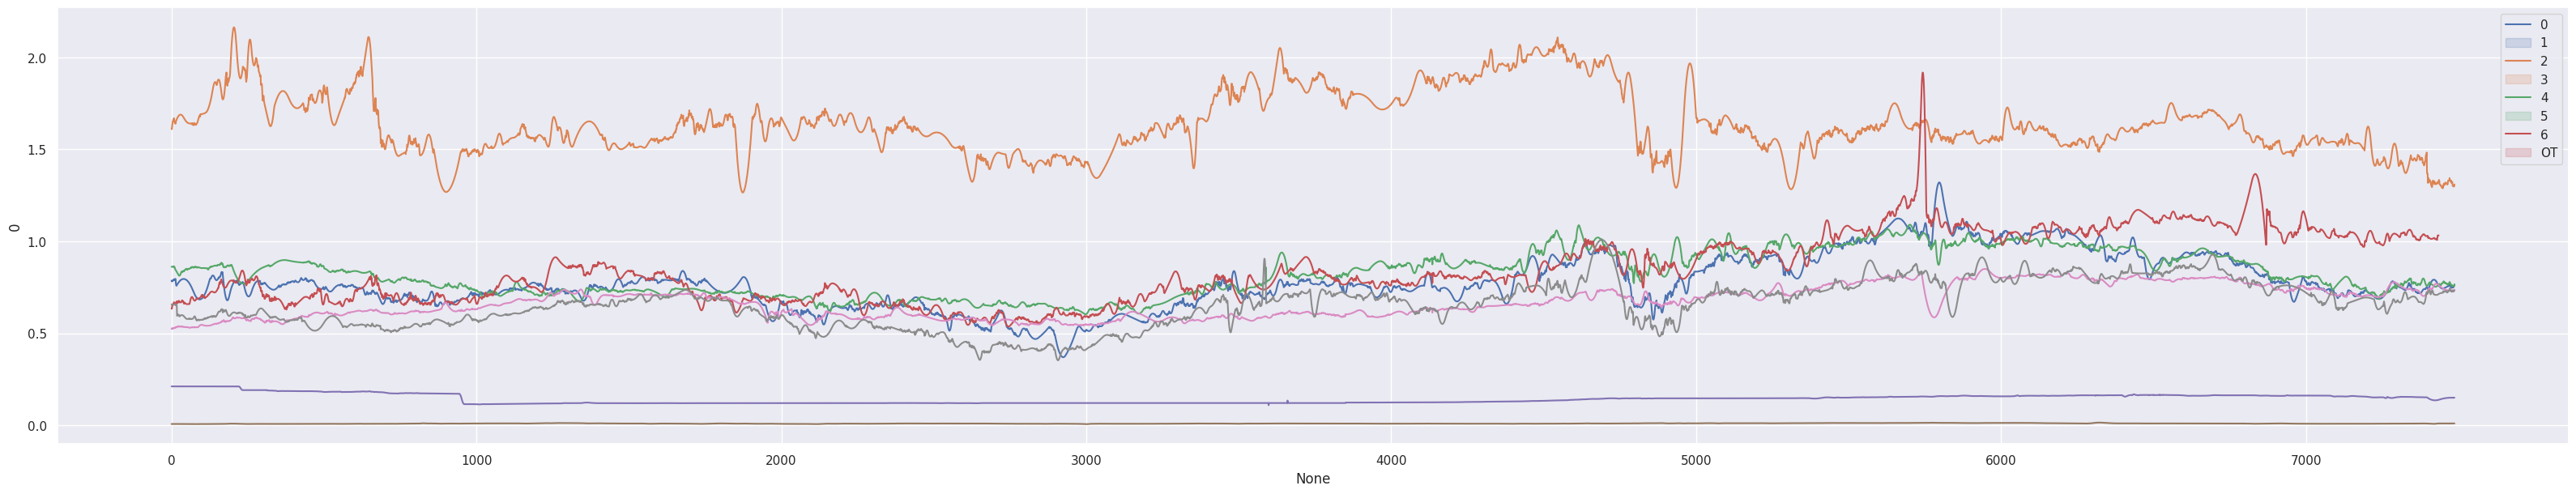

In [131]:
# Visualize data using seaborn
sns.set(rc={'figure.figsize':(40,7)})
sns.lineplot(x=data.index, y=data['0'])
sns.lineplot(x=data.index, y=data['1'])
sns.lineplot(x=data.index, y=data['2'])
sns.lineplot(x=data.index, y=data['3'])
sns.lineplot(x=data.index, y=data['4'])
sns.lineplot(x=data.index, y=data['5'])
sns.lineplot(x=data.index, y=data['6'])
sns.lineplot(x=data.index, y=data['OT'])


plt.legend(['0', '1', '2', '3', '4', '5', '6', 'OT'])

In [132]:
# Change variable names
data = data[["date", "6", "0", "1","2", "3", "4", "5", "OT"]]  # Select relevant columns
data.rename(columns={"date": "ds", "6": "y"}, inplace=True)  # Rename for NeuralProphet

# Take a look at the data
data.head()

,ds,y,0,1,2,3,4,5,OT
0,1990/1/1 0:00,0.525486,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.657007
1,1990/1/2 0:00,0.523972,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.657007
2,1990/1/3 0:00,0.526316,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.657007
3,1990/1/4 0:00,0.523834,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.657007
4,1990/1/5 0:00,0.527426,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.657007


In [133]:
# Check correlation
#data.corrwith(data["y"])

# Correlation with columns '1' '5'
corr_0 = data['y'].corr(data["0"])
corr_1 = data['y'].corr(data["1"])
corr_2 = data['y'].corr(data['2'])
corr_3 = data['y'].corr(data['3'])
corr_4 = data['y'].corr(data['4'])
corr_5 = data['y'].corr(data['5'])
corr_6 = data['y'].corr(data['OT'])


print('Correlation 0:', corr_0)
print('Correlation 1:', corr_1)
print('Correlation 2:', corr_2)
print('Correlation 3:', corr_3)
print('Correlation 4:', corr_4)
print('Correlation 5:', corr_5)
print('Correlation OT:', corr_6)


#Variables 3 et (OT) sont les plus proches

Correlation 0: 0.7589162782052605
Correlation 1: -0.14342485219627168
Correlation 2: 0.6192414046587464
Correlation 3: 0.8473769930860683
Correlation 4: 0.22209030775987168
Correlation 5: 0.6597165630732992
Correlation OT: 0.7974521325112885


In [134]:
# Train test split
train = data[data['ds'] <= train_end_date]
test = data[data['ds'] > train_end_date]

# Check the shape of the dataset
print(train.shape)
print(test.shape)

(7305, 9)
(183, 9)


In [135]:
# Check the start and end time of the training and testing dataset
print('The start time of the training dataset is ', train['ds'].min())
print('The end time of the training dataset is ', train['ds'].max())
print('The start time of the testing dataset is ', test['ds'].min())
print('The end time of the testing dataset is ', test['ds'].max())

The start time of the training dataset is  1990/1/1 0:00
The end time of the training dataset is  2009/9/9 0:00
The start time of the testing dataset is  2010/1/1 0:00
The end time of the testing dataset is  2010/7/2 0:00


## Step 5.1: Build Baseline Model

In [136]:
# Use the default hyperparameters to initiate the Prophet model
model_baseline = Prophet()

# Fit the model on the training dataset
model_baseline.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg9co4yqr/gh62eduz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg9co4yqr/2cb67rmg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7797', 'data', 'file=/tmp/tmpg9co4yqr/gh62eduz.json', 'init=/tmp/tmpg9co4yqr/2cb67rmg.json', 'output', 'file=/tmp/tmpg9co4yqr/prophet_modeldnnqxl_e/prophet_model-20240421161719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:17:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


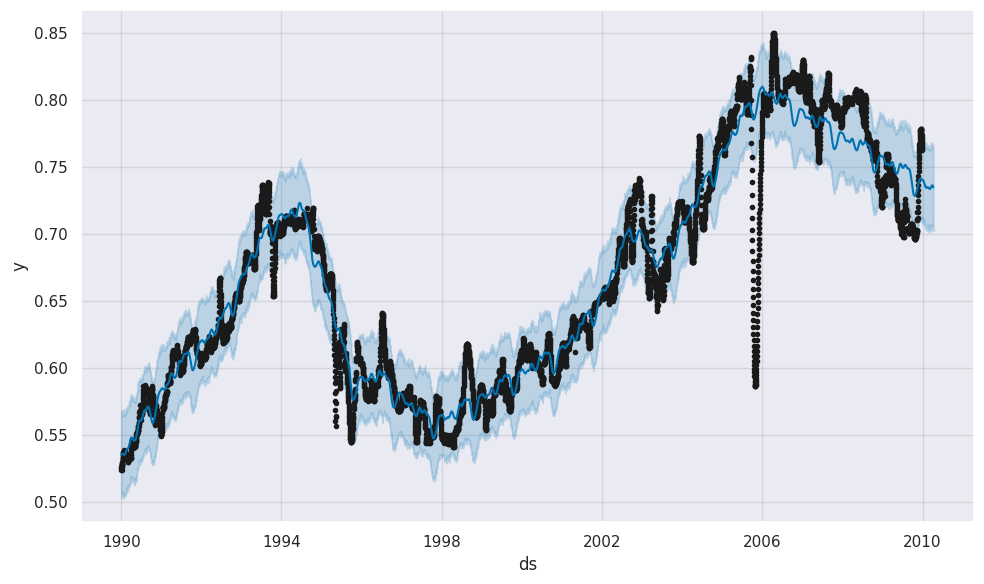

In [137]:
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=100)

# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)

# Visualize the forecast
model_baseline.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart

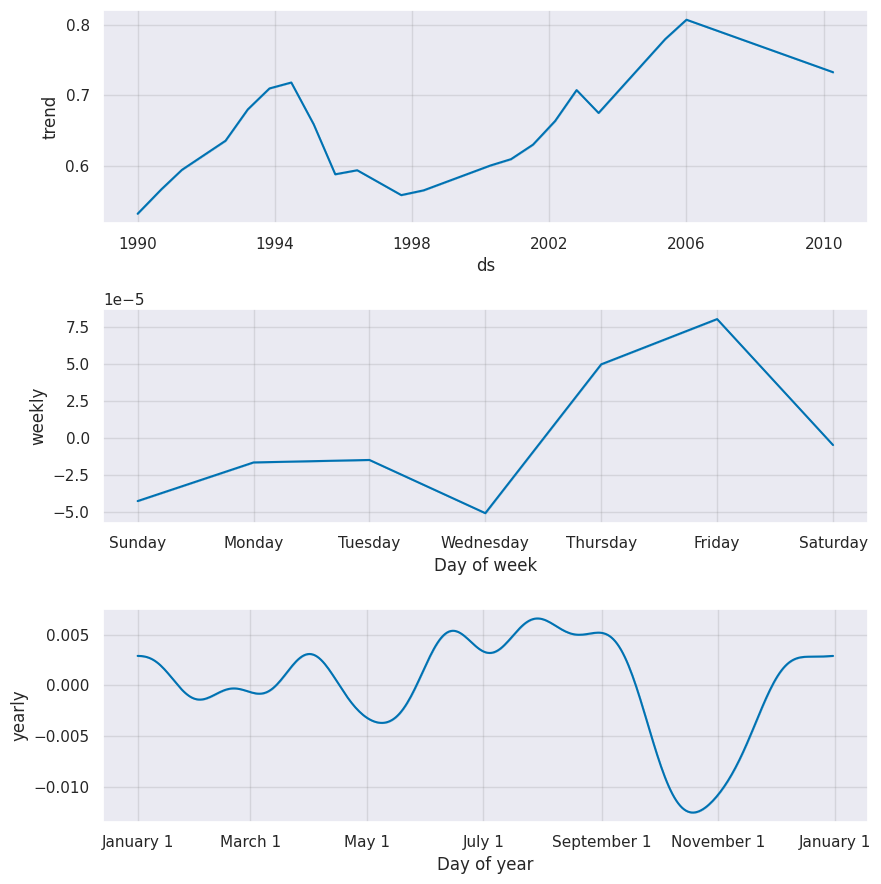

In [138]:
# Visualize the forecast components
model_baseline.plot_components(forecast_baseline);

In [139]:
# Merge actual and predicted values

test['ds'] = pd.to_datetime(test['ds'])  # Convert to datetime

performance_baseline = pd.merge(test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-100:], on='ds')



# Check MAE value
performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')

# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')


The MAE for the baseline model is 0.01092945490344828
The MAPE for the baseline model is 0.015105807467141276


<ipython-input-139-9df612ef542b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ds'] = pd.to_datetime(test['ds'])  # Convert to datetime


In [140]:
# Add seasonality
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)

# Fit the model on the training dataset
model_season.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg9co4yqr/0zyksvbu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg9co4yqr/qg2xq1qc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75105', 'data', 'file=/tmp/tmpg9co4yqr/0zyksvbu.json', 'init=/tmp/tmpg9co4yqr/qg2xq1qc.json', 'output', 'file=/tmp/tmpg9co4yqr/prophet_model43bdltvk/prophet_model-20240421161735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:17:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:17:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


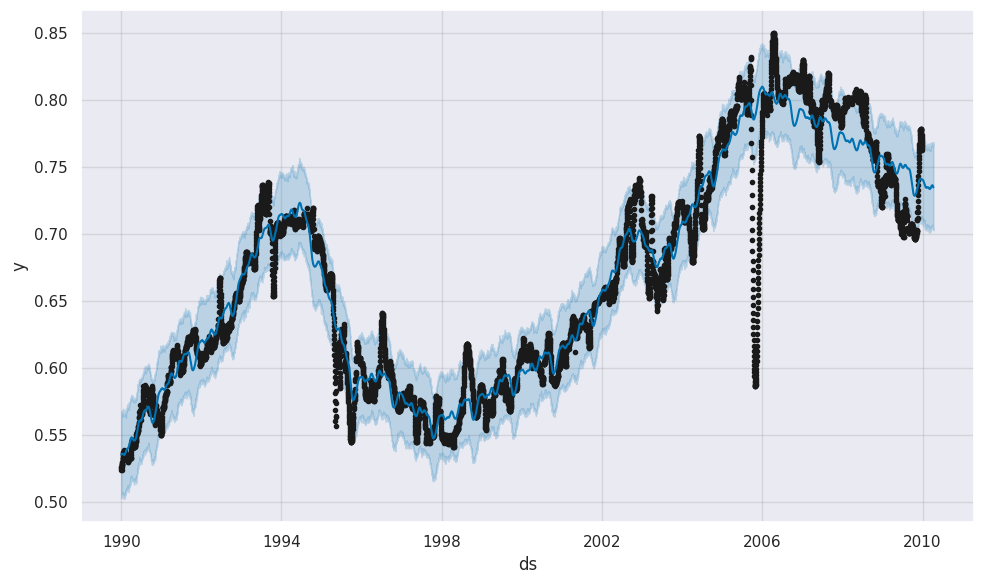

In [141]:
# Create the time range for the forecast
future_season = model_season.make_future_dataframe(periods=100)

# Make prediction
forecast_season = model_season.predict(future_season)

# Visualize the forecast
model_season.plot(forecast_season); # Add semi-colon to remove the duplicated chart

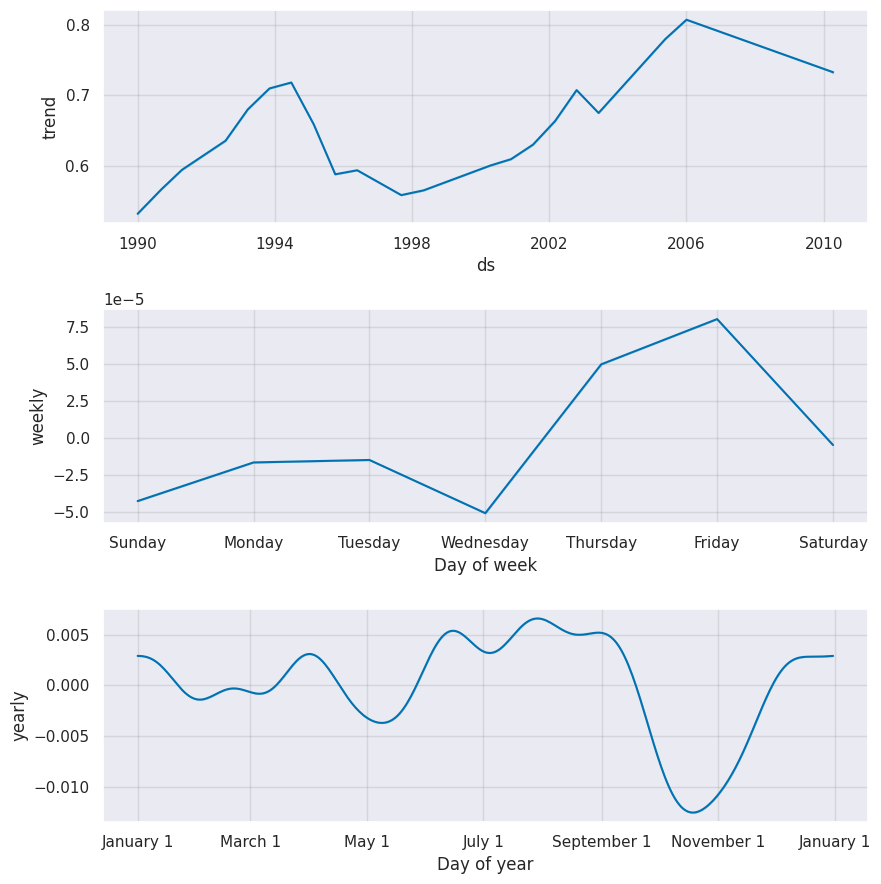

In [142]:
# Visualize the forecast components
model_season.plot_components(forecast_season);

In [143]:
# Merge actual and predicted values
performance_season = pd.merge(test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-100:], on='ds')

# Check MAE value
performance_season_MAE = mean_absolute_error(performance_season['y'], performance_season['yhat'])
print(f'The MAE for the seasonality model is {performance_season_MAE}')

# Check MAPE value
performance_season_MAPE = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
print(f'The MAPE for the seasonality model is {performance_season_MAPE}')

The MAE for the seasonality model is 0.01092945490344828
The MAPE for the seasonality model is 0.015105807467141276


In [144]:
# Add seasonality
model_multivariate = Prophet(yearly_seasonality=True, weekly_seasonality=True)

# Add regressor
model_multivariate.add_regressor('3', standardize=True)#par defaut False
model_multivariate.add_regressor('OT', standardize=True)#par defaut False
#model_multivariate.add_regressor('0', standardize=True)#par defaut False



# Fit the model on the training dataset
model_multivariate.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg9co4yqr/p3wdkk42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg9co4yqr/gin52moi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71560', 'data', 'file=/tmp/tmpg9co4yqr/p3wdkk42.json', 'init=/tmp/tmpg9co4yqr/gin52moi.json', 'output', 'file=/tmp/tmpg9co4yqr/prophet_modell6jb1oag/prophet_model-20240421161751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:17:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [145]:
# Create the time range for the forecast
future_multivariate = model_multivariate.make_future_dataframe(periods=100)

# Append the regressor values


#sol
if data['ds'].dtype == 'object':
  data['ds'] = pd.to_datetime(data['ds'])  # Convert to datetime in 'data' DataFrame
else:
  future_multivariate['ds'] = pd.to_datetime(future_multivariate['ds'])  # Convert to datetime in 'future_multivariate' DataFrame

future_multivariate = pd.merge(future_multivariate, data[['ds', '3', 'OT']], on='ds', how='inner')



# Fill the missing values with the previous value
future_multivariate = future_multivariate.fillna(method='ffill')

# Check the data
future_multivariate.tail(10)

,ds,3,OT
7395,2010-04-01,1.028183,0.715820
7396,2010-04-02,1.028604,0.724113
7397,2010-04-03,1.029458,0.713318
7398,2010-04-04,1.030721,0.713318
7399,2010-04-05,1.030721,0.716169
7400,2010-04-06,1.022411,0.719547
7401,2010-04-07,1.017895,0.723454
7402,2010-04-08,1.021607,0.727888
7403,2010-04-09,1.020689,0.732418
7404,2010-04-10,1.018952,0.734450


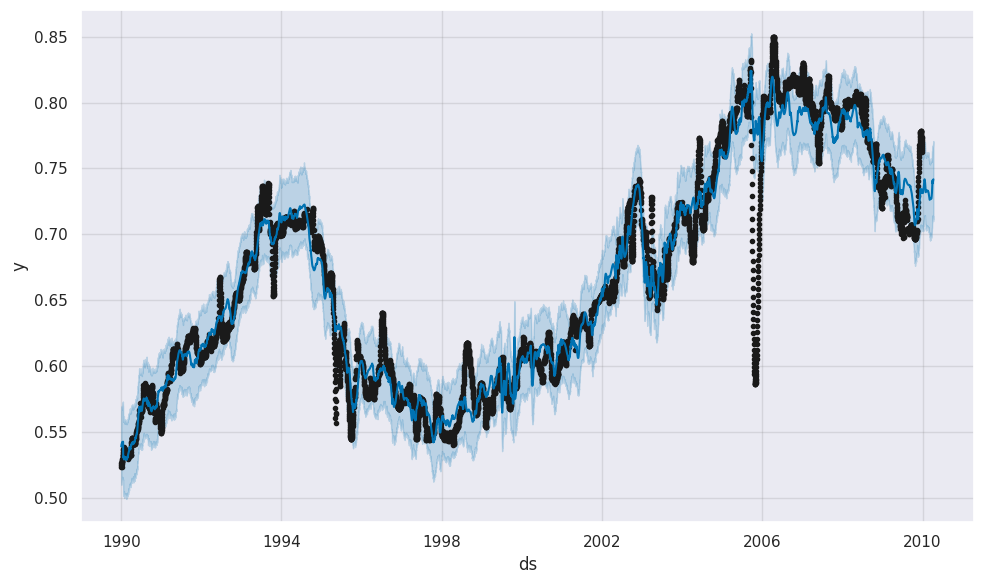

In [146]:
# Make prediction
forecast_multivariate = model_multivariate.predict(future_multivariate)

# Visualize the forecast
model_multivariate.plot(forecast_multivariate); # Add semi-colon to remove the duplicated chart

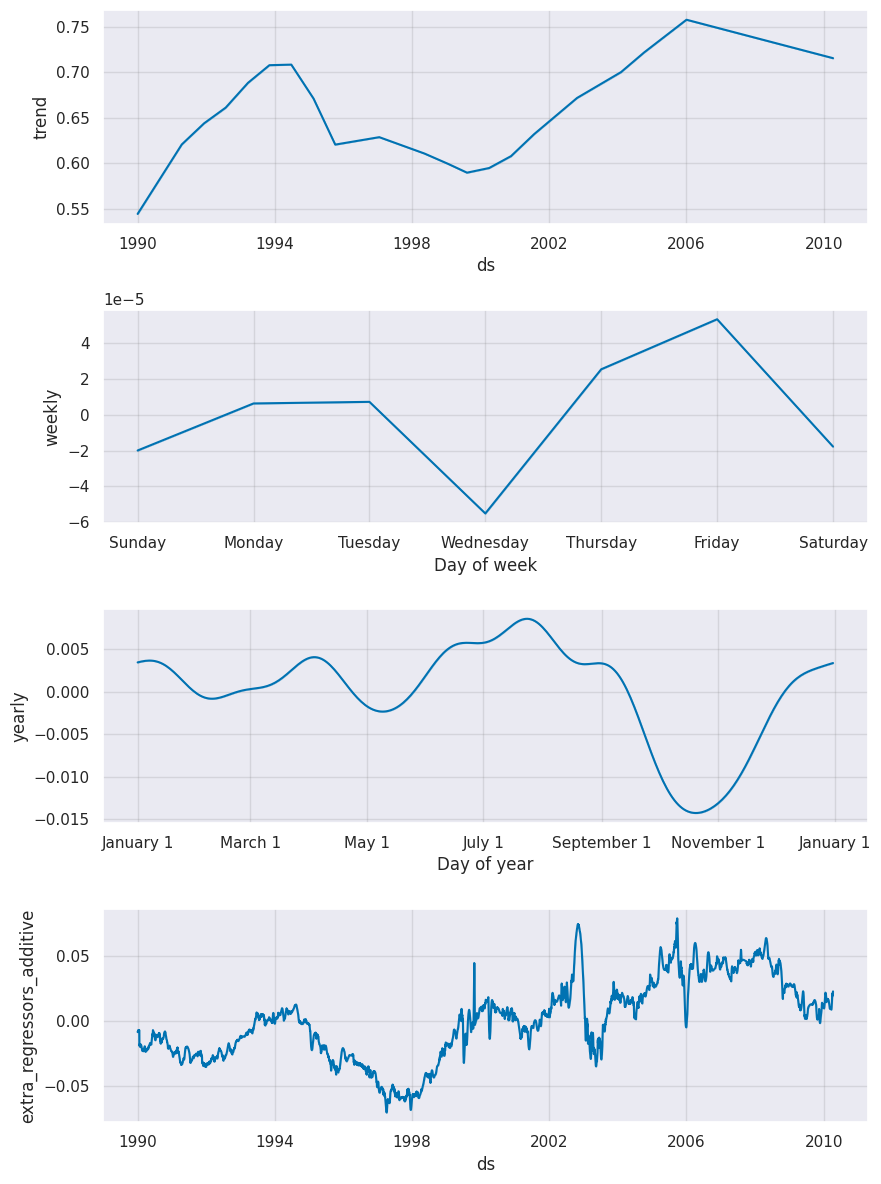

In [147]:
# Visualize the forecast components
model_multivariate.plot_components(forecast_multivariate);

In [148]:
# Merge actual and predicted values
performance_multivariate = pd.merge(test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-100:], on='ds')

# Check MAE value
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the multivariate model is {performance_multivariate_MAE}')

# Check MAPE value
performance_multivariate_MAPE = mean_absolute_percentage_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAPE for the multivariate model is {performance_multivariate_MAPE}')

The MAE for the multivariate model is 0.01066835757371245
The MAPE for the multivariate model is 0.014650511598674323


In [149]:
print(forecast_multivariate)

forecast_multivariate.to_csv('predictions.csv')

             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    1990-01-01  0.544408    0.510528    0.566433     0.544408     0.544408   
1    1990-01-02  0.544571    0.512093    0.566952     0.544571     0.544571   
2    1990-01-03  0.544733    0.510255    0.569189     0.544733     0.544733   
3    1990-01-04  0.544896    0.512789    0.567630     0.544896     0.544896   
4    1990-01-05  0.545059    0.511593    0.567964     0.545059     0.545059   
...         ...       ...         ...         ...          ...          ...   
7400 2010-04-06  0.715502    0.712003    0.767079     0.715023     0.715915   
7401 2010-04-07  0.715475    0.710775    0.768098     0.714961     0.715908   
7402 2010-04-08  0.715448    0.710077    0.769313     0.714904     0.715899   
7403 2010-04-09  0.715421    0.713840    0.770785     0.714808     0.715889   
7404 2010-04-10  0.715394    0.711959    0.768511     0.714755     0.715886   

             3   3_lower   3_upper        OT  ...  